# Two stage neural network implementation for MNIST digits classifier using *Start* 

## Overview

This is a step by step implementation of a multilayer neural network for [MNIST](https://en.wikipedia.org/wiki/MNIST_database) digit classification using *Start*. Input images in MNIST database are 28x28 pixels. Images are black and white so one bit is required to represents each pixel. This neural network classifies input image to one of the possible digits (0-9).

## Importing packages
*Start* and mnist packages are in the src directory. **"*Start* install path"/start/src** directory needs to be in $PYTHONPATH for these packages to load.
* mnist package is used for loading mnist data and other related functions.
* *Start* package that has the components to build a neural network.

In [1]:
import numpy as np
import mnist.utils.load_mnist as load_mnist
import mnist.utils.image as image
import start.neural_network as nn
import start.layer_dict as ld
import start.weight_update_params as wup

## Loading MNIST data
load_mnist function returns training data, validation data and test data as three numpy arrays.
Shape of these arrays is Number of samples * 795.

![title](data_matrix_shape.jpg)

In [2]:
# Load the training, validation and test data
# Each data is a numpy array of shape Number of Samples * 795
# 0:783 are inputs, 784:793 are outputs, 794 is classified output
# N is chose as first dimention as it is easy to shuffle training data
# during training
training_data, validation_data, test_data = load_mnist.load_mnist()

validation_x = np.transpose(validation_data[:, 0:784]) 
validation_y_class = np.transpose(validation_data[:, 794])
val_acc = lambda: net.classification_accuracy(validation_x, validation_y_class)

test_x = np.transpose(test_data[:, 0:784]) 
test_y_class = np.transpose(test_data[:, 794])
test_acc = lambda: net.classification_accuracy(test_x, test_y_class)

##

## Neural Network architecture
The MNIST digit classifier net in this eaxmaple has the following architecture.
![title](mnist_net_arch.jpg)


## Creating the net object
A neural net object is created layer by layer. The first step is to create a net object. Input layer is created automatically when a net is created.


In [3]:
# Create Network - specify input layer neurons (28x28=784)
net = nn.NeuralNetwork("test_net", 784)

## Adding layers
Layers are added sequentially to the net. Last layer added has to be an output layer.

In [4]:
# Fully connected layer of 800 neurons
layer = ld.hdict["fc"](800)
net.add_layer(layer)

# Relu activation layer of 800 neurons
layer = ld.hdict["relu"](800)
net.add_layer(layer)

# Fully connected layer of 80 neurons
layer = ld.hdict["fc"](80)
net.add_layer(layer)

# Fully connected layer of 80 neurons
layer = ld.hdict["relu"](80)
net.add_layer(layer)

# Fully connected layer of 10 neurons
layer = ld.hdict["fc"](10)
net.add_layer(layer)

# Add softmax output layer
layer = ld.odict["softmax"](10)
net.add_layer(layer)

## Check the network architecture

In [5]:
net.check_arch()

## Specify L2 loss coeffcient

In [6]:
# Specify l2 loss
net.set_l2_loss_coeff(.001)

## Set weight update method

In [7]:
# Define weight update method
params = wup.GradientDescentParams(.3)
# params = wup.MomentumParams(.3)
# params = wup.AdamParams()
net.set_weight_update_function(params)

## Initialize the network

In [8]:
# For repeatability of results published below
np.random.seed(1)
# Initialize the network
net.initialize_parameters()

## Train the network

In [9]:
# Set training related parameters
mini_batch_size = 32
epochs = 20
verbose = 0

# Train the network
for epoch in range(1, epochs+1):
    print("Epoch " + str(epoch))
    np.random.shuffle(training_data)
    mini_batches = [training_data[k:k + mini_batch_size, :] for k in
                   range(0, len(training_data), mini_batch_size)]
    for count, mini_batch in enumerate(mini_batches, start=1):
        x = np.transpose(mini_batch[:, 0:784])
        y = np.transpose(mini_batch[:, 784:794])
        net.train(x, y)
        if ((count%100 == 0) and verbose):
            print("Count {0} validation data accuracy = {1} %.".format(count, val_acc()))
            print()
            
        
    print("Epoch {0} validation data accuracy = {1} %.".format(epoch, val_acc()))
    print()


Epoch 1
Epoch 1 validation data accuracy = 96.47 %.

Epoch 2
Epoch 2 validation data accuracy = 95.51 %.

Epoch 3
Epoch 3 validation data accuracy = 91.68 %.

Epoch 4
Epoch 4 validation data accuracy = 96.28 %.

Epoch 5
Epoch 5 validation data accuracy = 95.96 %.

Epoch 6
Epoch 6 validation data accuracy = 97.43 %.

Epoch 7
Epoch 7 validation data accuracy = 97.87 %.

Epoch 8
Epoch 8 validation data accuracy = 97.41 %.

Epoch 9
Epoch 9 validation data accuracy = 97.84 %.

Epoch 10
Epoch 10 validation data accuracy = 97.93 %.

Epoch 11
Epoch 11 validation data accuracy = 98.23 %.

Epoch 12
Epoch 12 validation data accuracy = 97.16 %.

Epoch 13
Epoch 13 validation data accuracy = 98.14 %.

Epoch 14
Epoch 14 validation data accuracy = 98.42 %.

Epoch 15
Epoch 15 validation data accuracy = 98.34 %.

Epoch 16
Epoch 16 validation data accuracy = 98.37 %.

Epoch 17
Epoch 17 validation data accuracy = 98.37 %.

Epoch 18
Epoch 18 validation data accuracy = 98.37 %.

Epoch 19
Epoch 19 validation

## Test data accuracy

In [10]:
print("Test data accuracy = {0} %.".format(test_acc()))
print()

Test data accuracy = 98.59 %.



# Analyzing results

## collecting error cases
Get the classfied and raw predicted outputs for the test data.

In [11]:
pred_y_class = net.predict_classify(test_x)
pred_y = net.predict(test_x)

# create a error dictionary

In [12]:
class errCase(object):
    def __init__(self, index, x, y, pred_y):
        self.index = index
        self.x = x
        self.img = x.reshape(28, 28)
        self.y = int(y)
        self.pred_y = pred_y
    
    def show(self):
        image.show(self.img)

errDict = {}
for i in range(pred_y_class.shape[0]):
  if (pred_y_class[i] != test_y_class[i]):
    errDict[i] = errCase(i, test_x[:, i], test_y_class[i], pred_y_class[i]) 


# analyze the error cases
Show the images for the failing samples. Also print the raw output for the label and predicted values. This gives an idea of the relative confidence.

Training data index =  8
Labeled class = 5 : Predicted class = 6
Predicted class output =  0.965531037363
Labeled class output =  0.034377925635



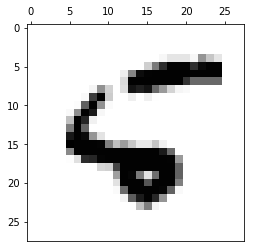

--------------------------------
Training data index =  247
Labeled class = 4 : Predicted class = 2
Predicted class output =  0.982535190811
Labeled class output =  1.85440755789e-05



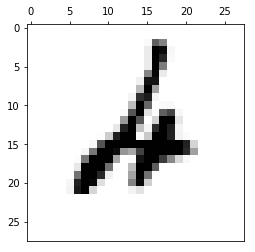

--------------------------------
Training data index =  321
Labeled class = 2 : Predicted class = 7
Predicted class output =  0.996253904621
Labeled class output =  0.00373447771466



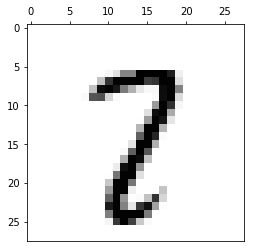

--------------------------------
Training data index =  340
Labeled class = 5 : Predicted class = 3
Predicted class output =  0.950478547032
Labeled class output =  0.0495214018324



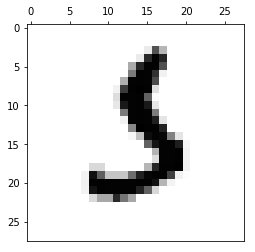

--------------------------------
Training data index =  445
Labeled class = 6 : Predicted class = 0
Predicted class output =  0.999640648778
Labeled class output =  0.000356577525542



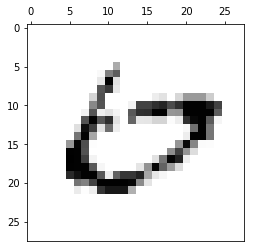

--------------------------------
Training data index =  447
Labeled class = 4 : Predicted class = 9
Predicted class output =  0.795957506363
Labeled class output =  0.19773202747



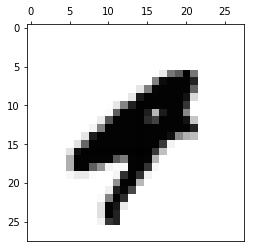

--------------------------------
Training data index =  449
Labeled class = 3 : Predicted class = 5
Predicted class output =  0.63091722027
Labeled class output =  0.369082778872



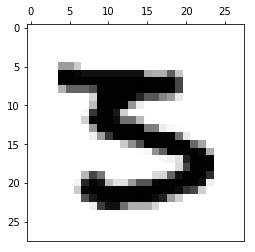

--------------------------------
Training data index =  582
Labeled class = 8 : Predicted class = 2
Predicted class output =  0.993122578828
Labeled class output =  0.00487055570972



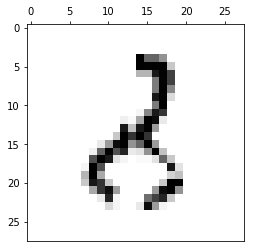

--------------------------------
Training data index =  646
Labeled class = 2 : Predicted class = 6
Predicted class output =  0.677475287985
Labeled class output =  0.31311217263



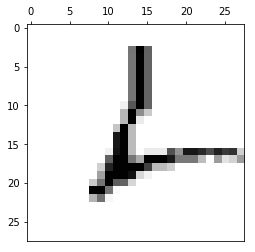

--------------------------------
Training data index =  674
Labeled class = 5 : Predicted class = 3
Predicted class output =  0.74173766724
Labeled class output =  0.258261771558



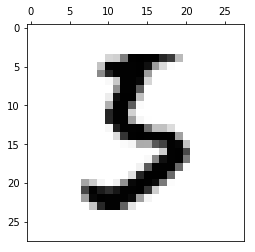

--------------------------------
Training data index =  684
Labeled class = 7 : Predicted class = 3
Predicted class output =  0.84985660606
Labeled class output =  0.126948583477



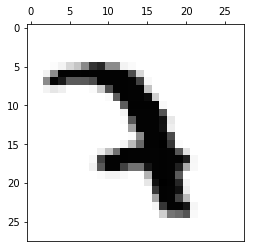

--------------------------------
Training data index =  720
Labeled class = 5 : Predicted class = 8
Predicted class output =  0.999974254894
Labeled class output =  1.85480899585e-05



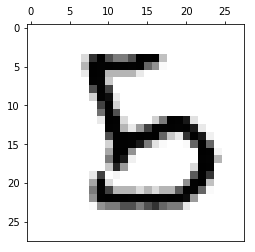

--------------------------------
Training data index =  740
Labeled class = 4 : Predicted class = 9
Predicted class output =  0.948815347308
Labeled class output =  0.051110155762



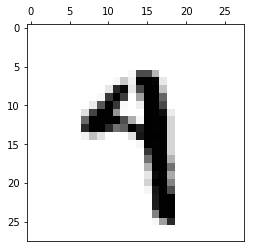

--------------------------------
Training data index =  900
Labeled class = 1 : Predicted class = 3
Predicted class output =  0.563860013135
Labeled class output =  0.267091342516



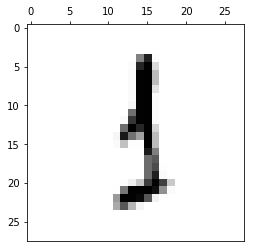

--------------------------------
Training data index =  947
Labeled class = 8 : Predicted class = 9
Predicted class output =  0.809956629427
Labeled class output =  0.189757911617



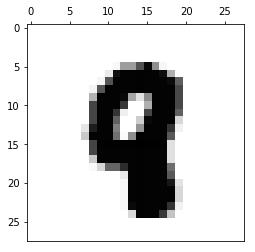

--------------------------------
Training data index =  951
Labeled class = 5 : Predicted class = 9
Predicted class output =  0.868974828981
Labeled class output =  0.0562817246684



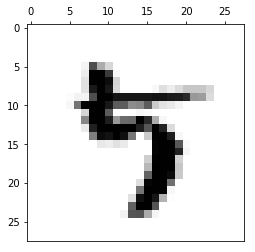

--------------------------------
Training data index =  1014
Labeled class = 6 : Predicted class = 5
Predicted class output =  0.964689530889
Labeled class output =  0.000794589451718



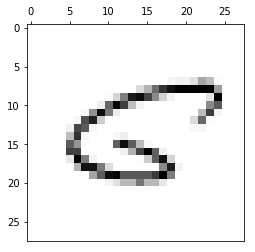

--------------------------------
Training data index =  1039
Labeled class = 7 : Predicted class = 2
Predicted class output =  0.503101227666
Labeled class output =  0.179567352526



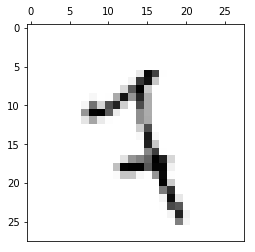

--------------------------------
Training data index =  1112
Labeled class = 4 : Predicted class = 6
Predicted class output =  0.999336140162
Labeled class output =  0.000649796083222



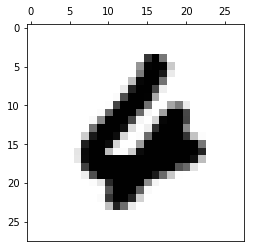

--------------------------------
Training data index =  1156
Labeled class = 7 : Predicted class = 8
Predicted class output =  0.920241029795
Labeled class output =  0.0293564703966



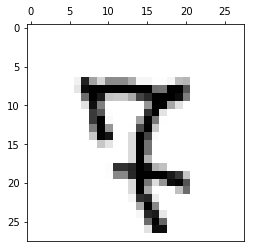

--------------------------------
Training data index =  1224
Labeled class = 2 : Predicted class = 4
Predicted class output =  0.72433642446
Labeled class output =  0.274750914768



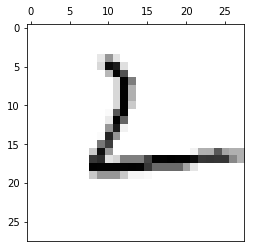

--------------------------------
Training data index =  1226
Labeled class = 7 : Predicted class = 2
Predicted class output =  0.996856722814
Labeled class output =  0.00180086991717



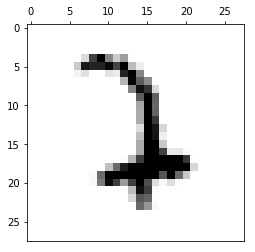

--------------------------------
Training data index =  1242
Labeled class = 4 : Predicted class = 9
Predicted class output =  0.998286426998
Labeled class output =  0.00130060066355



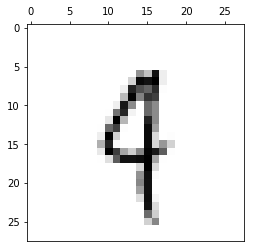

--------------------------------
Training data index =  1247
Labeled class = 9 : Predicted class = 5
Predicted class output =  0.782103911638
Labeled class output =  8.03901261756e-06



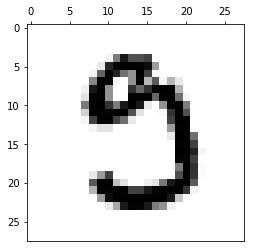

--------------------------------
Training data index =  1319
Labeled class = 8 : Predicted class = 3
Predicted class output =  0.999460807289
Labeled class output =  1.19874502562e-05



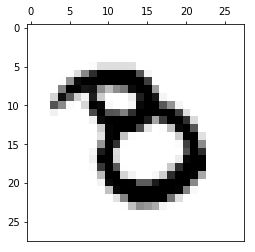

--------------------------------
Training data index =  1328
Labeled class = 7 : Predicted class = 9
Predicted class output =  0.62050118905
Labeled class output =  0.0695940688743



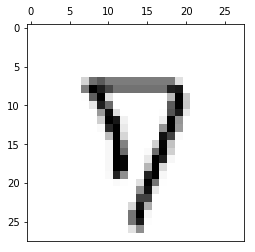

--------------------------------
Training data index =  1393
Labeled class = 5 : Predicted class = 3
Predicted class output =  0.532909999308
Labeled class output =  0.466771001224



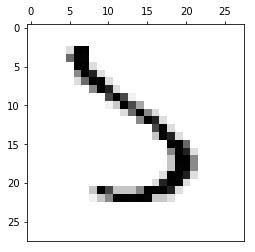

--------------------------------
Training data index =  1395
Labeled class = 2 : Predicted class = 3
Predicted class output =  0.581588188795
Labeled class output =  0.339199632182



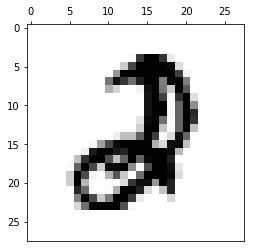

--------------------------------
Training data index =  1522
Labeled class = 7 : Predicted class = 9
Predicted class output =  0.782627433238
Labeled class output =  0.198840378375



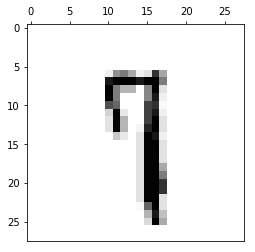

--------------------------------
Training data index =  1530
Labeled class = 8 : Predicted class = 7
Predicted class output =  0.999780963869
Labeled class output =  6.85338290218e-05



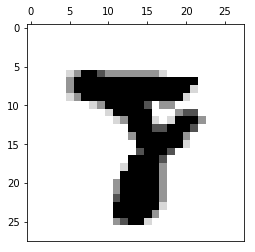

--------------------------------
Training data index =  1549
Labeled class = 4 : Predicted class = 6
Predicted class output =  0.985209834856
Labeled class output =  0.000157501222874



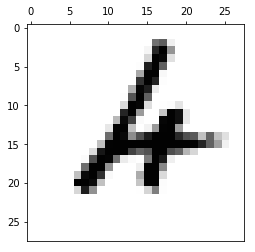

--------------------------------
Training data index =  1609
Labeled class = 2 : Predicted class = 6
Predicted class output =  0.969575149644
Labeled class output =  0.0269647156612



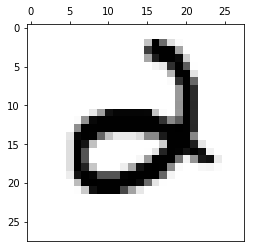

--------------------------------
Training data index =  1681
Labeled class = 3 : Predicted class = 7
Predicted class output =  0.99666213304
Labeled class output =  0.0031293794161



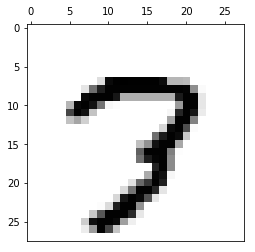

--------------------------------
Training data index =  1790
Labeled class = 2 : Predicted class = 8
Predicted class output =  0.745951725801
Labeled class output =  0.0877367465584



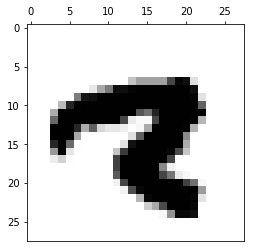

--------------------------------
Training data index =  1878
Labeled class = 8 : Predicted class = 3
Predicted class output =  0.716011236074
Labeled class output =  0.278821989716



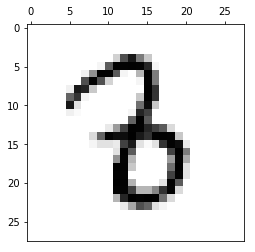

--------------------------------
Training data index =  1901
Labeled class = 9 : Predicted class = 4
Predicted class output =  0.99911515678
Labeled class output =  7.80967087321e-05



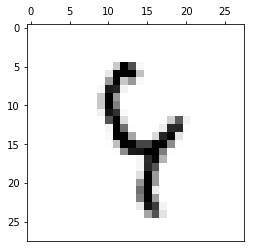

--------------------------------
Training data index =  1940
Labeled class = 5 : Predicted class = 0
Predicted class output =  0.889659832404
Labeled class output =  0.107286602707



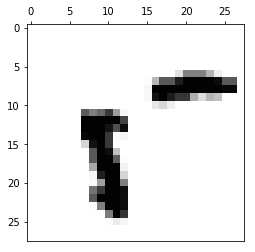

--------------------------------
Training data index =  1984
Labeled class = 2 : Predicted class = 0
Predicted class output =  0.769054123758
Labeled class output =  0.230903964155



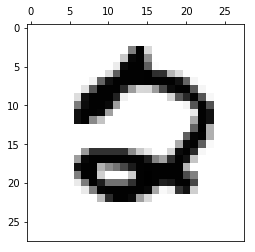

--------------------------------
Training data index =  2024
Labeled class = 7 : Predicted class = 9
Predicted class output =  0.975031731916
Labeled class output =  0.0249574014066



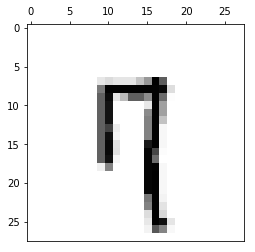

--------------------------------
Training data index =  2035
Labeled class = 5 : Predicted class = 3
Predicted class output =  0.603392302551
Labeled class output =  0.396607207206



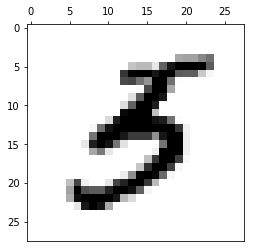

--------------------------------
Training data index =  2053
Labeled class = 4 : Predicted class = 9
Predicted class output =  0.892248714677
Labeled class output =  0.107732073791



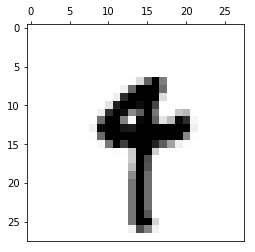

--------------------------------
Training data index =  2070
Labeled class = 7 : Predicted class = 9
Predicted class output =  0.576801821362
Labeled class output =  0.374712663464



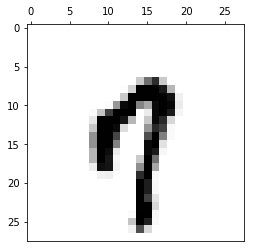

--------------------------------
Training data index =  2098
Labeled class = 2 : Predicted class = 0
Predicted class output =  0.571777597267
Labeled class output =  0.428222325803



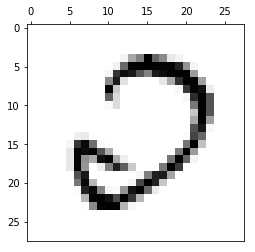

--------------------------------
Training data index =  2109
Labeled class = 3 : Predicted class = 7
Predicted class output =  0.930008986456
Labeled class output =  0.0203473676283



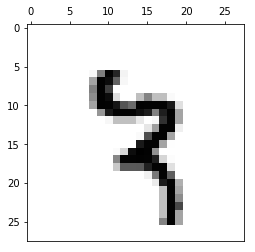

--------------------------------
Training data index =  2130
Labeled class = 4 : Predicted class = 9
Predicted class output =  0.94557158294
Labeled class output =  0.0544269157695



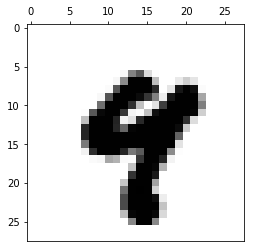

--------------------------------
Training data index =  2135
Labeled class = 6 : Predicted class = 1
Predicted class output =  0.987277140391
Labeled class output =  0.0111595848242



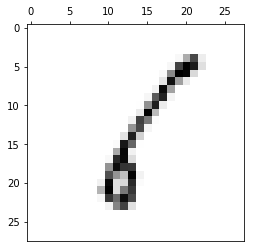

--------------------------------
Training data index =  2293
Labeled class = 9 : Predicted class = 6
Predicted class output =  0.822571051417
Labeled class output =  0.00410893125672



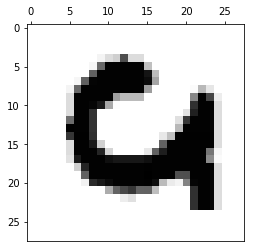

--------------------------------
Training data index =  2387
Labeled class = 9 : Predicted class = 1
Predicted class output =  0.987746884023
Labeled class output =  0.0110357017516



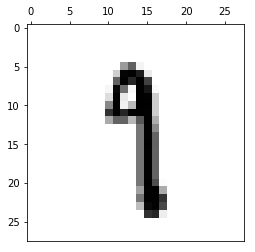

--------------------------------
Training data index =  2488
Labeled class = 2 : Predicted class = 4
Predicted class output =  0.987371362075
Labeled class output =  0.00257125190904



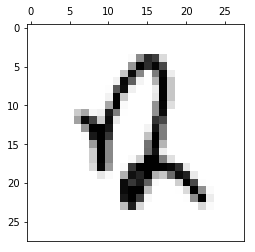

--------------------------------
Training data index =  2597
Labeled class = 5 : Predicted class = 3
Predicted class output =  0.999912757976
Labeled class output =  8.34445722117e-05



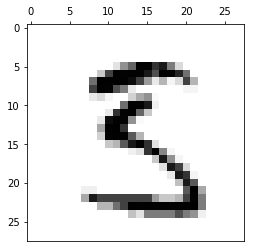

--------------------------------
Training data index =  2648
Labeled class = 9 : Predicted class = 0
Predicted class output =  0.994404919816
Labeled class output =  0.00132299668196



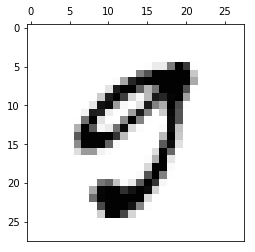

--------------------------------
Training data index =  2654
Labeled class = 6 : Predicted class = 1
Predicted class output =  0.999994145983
Labeled class output =  2.67734826567e-07



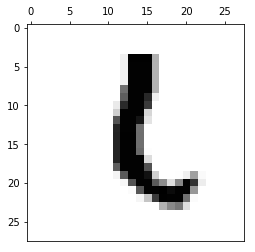

--------------------------------
Training data index =  2810
Labeled class = 5 : Predicted class = 3
Predicted class output =  0.729415937837
Labeled class output =  0.270567558384



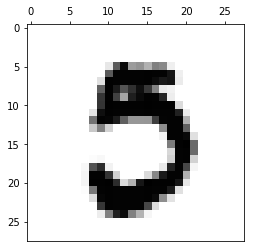

--------------------------------
Training data index =  2877
Labeled class = 4 : Predicted class = 7
Predicted class output =  0.940738520288
Labeled class output =  0.00131734679484



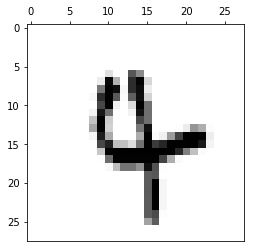

--------------------------------
Training data index =  2921
Labeled class = 3 : Predicted class = 2
Predicted class output =  0.985493651768
Labeled class output =  0.00471665344828



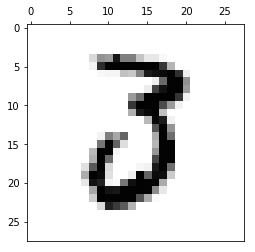

--------------------------------
Training data index =  2939
Labeled class = 9 : Predicted class = 7
Predicted class output =  0.997547140027
Labeled class output =  2.8004479634e-06



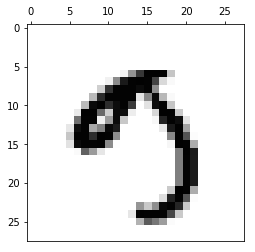

--------------------------------
Training data index =  2953
Labeled class = 3 : Predicted class = 5
Predicted class output =  0.971714609148
Labeled class output =  0.0279143271573



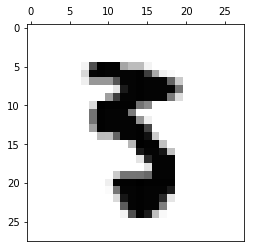

--------------------------------
Training data index =  3073
Labeled class = 1 : Predicted class = 2
Predicted class output =  0.951709571406
Labeled class output =  0.0464508302986



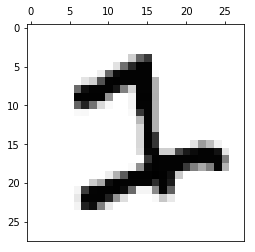

--------------------------------
Training data index =  3117
Labeled class = 5 : Predicted class = 9
Predicted class output =  0.988222120722
Labeled class output =  0.008521735455



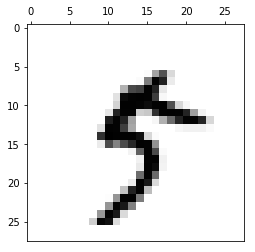

--------------------------------
Training data index =  3289
Labeled class = 8 : Predicted class = 9
Predicted class output =  0.873513011906
Labeled class output =  0.123012250773



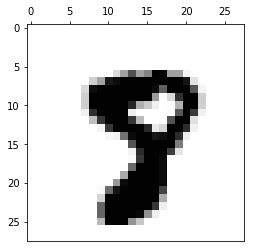

--------------------------------
Training data index =  3405
Labeled class = 4 : Predicted class = 9
Predicted class output =  0.595359134202
Labeled class output =  0.40463750229



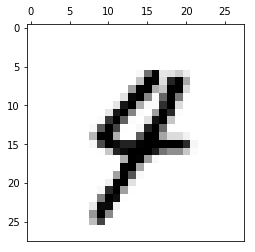

--------------------------------
Training data index =  3422
Labeled class = 6 : Predicted class = 0
Predicted class output =  0.993830678959
Labeled class output =  0.00613610383296



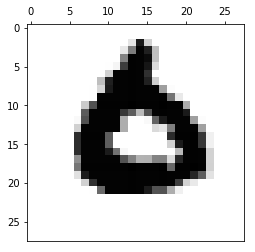

--------------------------------
Training data index =  3451
Labeled class = 7 : Predicted class = 3
Predicted class output =  0.5883509682
Labeled class output =  0.310994299086



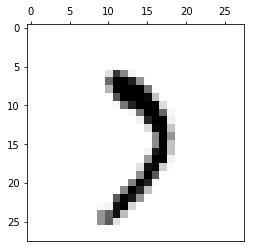

--------------------------------
Training data index =  3475
Labeled class = 3 : Predicted class = 7
Predicted class output =  0.693049710757
Labeled class output =  0.306605004757



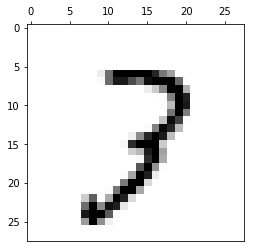

--------------------------------
Training data index =  3503
Labeled class = 9 : Predicted class = 1
Predicted class output =  0.996843221877
Labeled class output =  0.00210690227752



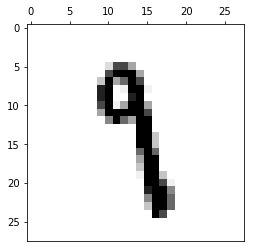

--------------------------------
Training data index =  3520
Labeled class = 6 : Predicted class = 4
Predicted class output =  0.999990689598
Labeled class output =  1.15789310383e-07



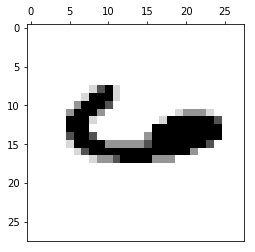

--------------------------------
Training data index =  3533
Labeled class = 4 : Predicted class = 9
Predicted class output =  0.683892083904
Labeled class output =  0.305052248575



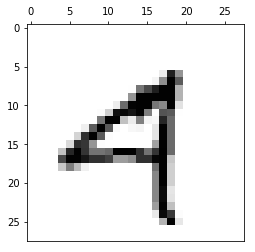

--------------------------------
Training data index =  3549
Labeled class = 3 : Predicted class = 2
Predicted class output =  0.540189008987
Labeled class output =  0.458174070064



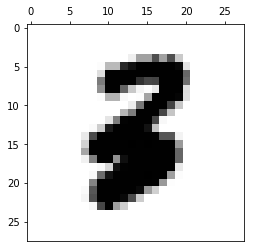

--------------------------------
Training data index =  3558
Labeled class = 5 : Predicted class = 0
Predicted class output =  0.974748618357
Labeled class output =  0.0243261764423



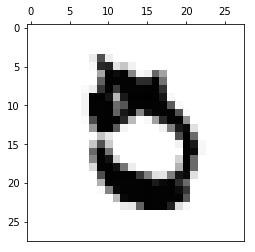

--------------------------------
Training data index =  3776
Labeled class = 5 : Predicted class = 8
Predicted class output =  0.966076646769
Labeled class output =  0.0339231723399



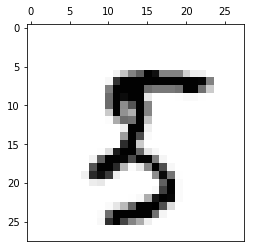

--------------------------------
Training data index =  3780
Labeled class = 4 : Predicted class = 6
Predicted class output =  0.645585970747
Labeled class output =  0.354220844575



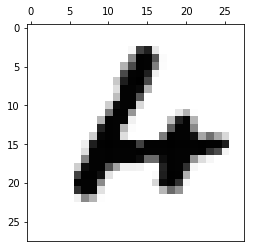

--------------------------------
Training data index =  3808
Labeled class = 7 : Predicted class = 8
Predicted class output =  0.992734634899
Labeled class output =  0.00675015346352



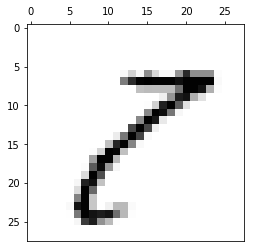

--------------------------------
Training data index =  3818
Labeled class = 0 : Predicted class = 4
Predicted class output =  0.490085775374
Labeled class output =  0.439333060914



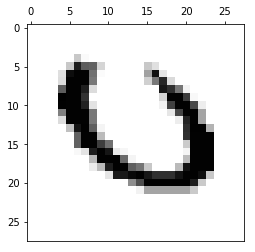

--------------------------------
Training data index =  3853
Labeled class = 6 : Predicted class = 0
Predicted class output =  0.465867929352
Labeled class output =  0.182166139937



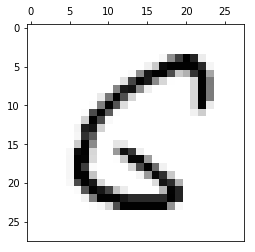

--------------------------------
Training data index =  3893
Labeled class = 5 : Predicted class = 6
Predicted class output =  0.593599653545
Labeled class output =  0.403789613085



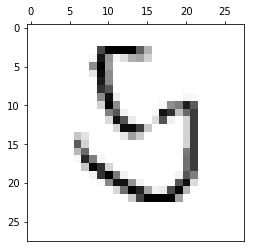

--------------------------------
Training data index =  3941
Labeled class = 4 : Predicted class = 2
Predicted class output =  0.54967118941
Labeled class output =  7.59964585937e-05



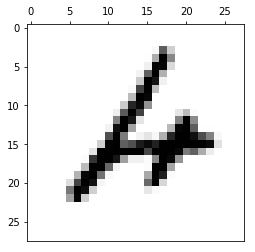

--------------------------------
Training data index =  3943
Labeled class = 3 : Predicted class = 5
Predicted class output =  0.892382350248
Labeled class output =  0.107612831997



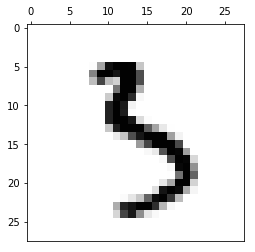

--------------------------------
Training data index =  3985
Labeled class = 9 : Predicted class = 4
Predicted class output =  0.956135280945
Labeled class output =  0.0438646481423



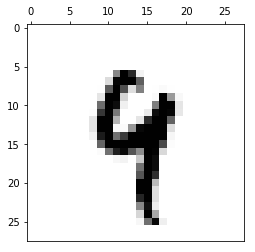

--------------------------------
Training data index =  4065
Labeled class = 0 : Predicted class = 2
Predicted class output =  0.919907545472
Labeled class output =  0.00775647205266



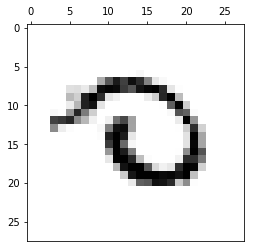

--------------------------------
Training data index =  4075
Labeled class = 8 : Predicted class = 3
Predicted class output =  0.844889124958
Labeled class output =  0.124967828909



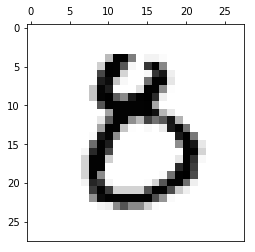

--------------------------------
Training data index =  4078
Labeled class = 9 : Predicted class = 3
Predicted class output =  0.854536424591
Labeled class output =  0.130906937571



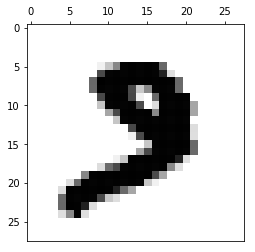

--------------------------------
Training data index =  4140
Labeled class = 8 : Predicted class = 2
Predicted class output =  0.674237713911
Labeled class output =  0.325729879803



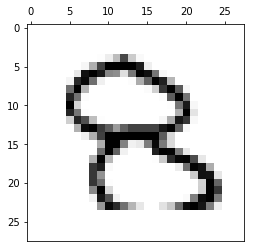

--------------------------------
Training data index =  4156
Labeled class = 2 : Predicted class = 3
Predicted class output =  0.67817809696
Labeled class output =  0.307813831806



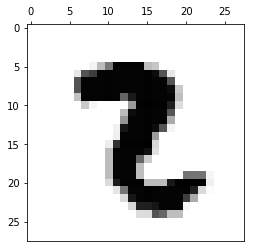

--------------------------------
Training data index =  4176
Labeled class = 2 : Predicted class = 7
Predicted class output =  0.999801032514
Labeled class output =  0.00015841759166



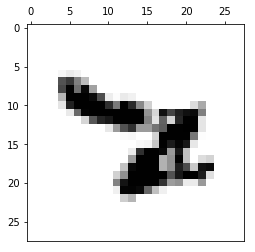

--------------------------------
Training data index =  4199
Labeled class = 7 : Predicted class = 9
Predicted class output =  0.956414187789
Labeled class output =  0.0399616001805



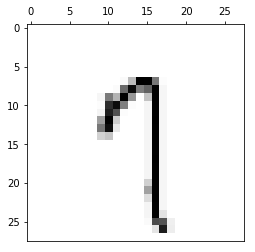

--------------------------------
Training data index =  4201
Labeled class = 1 : Predicted class = 7
Predicted class output =  0.746781700982
Labeled class output =  0.25240121793



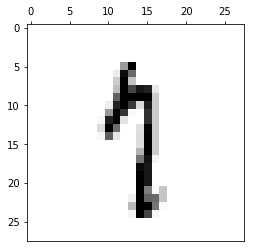

--------------------------------
Training data index =  4248
Labeled class = 2 : Predicted class = 8
Predicted class output =  0.700480861602
Labeled class output =  0.0815428839152



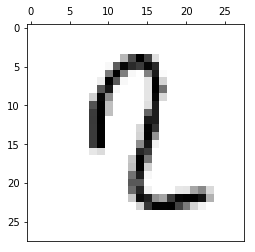

--------------------------------
Training data index =  4271
Labeled class = 5 : Predicted class = 3
Predicted class output =  0.64068030367
Labeled class output =  0.354919542795



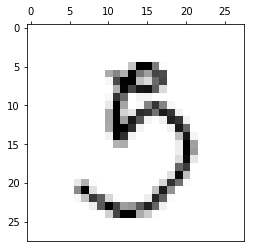

--------------------------------
Training data index =  4289
Labeled class = 2 : Predicted class = 7
Predicted class output =  0.561992655726
Labeled class output =  0.192347027138



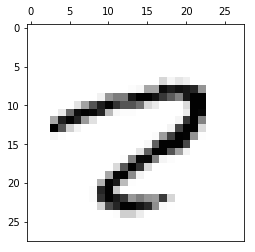

--------------------------------
Training data index =  4360
Labeled class = 5 : Predicted class = 3
Predicted class output =  0.827900264937
Labeled class output =  0.165361248857



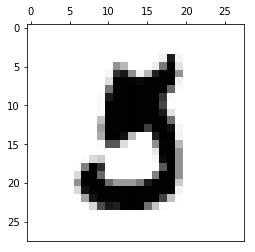

--------------------------------
Training data index =  4425
Labeled class = 9 : Predicted class = 4
Predicted class output =  0.640919900467
Labeled class output =  0.359037199263



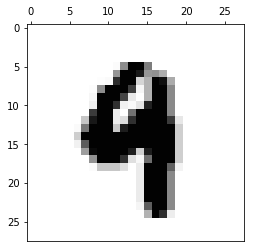

--------------------------------
Training data index =  4497
Labeled class = 8 : Predicted class = 7
Predicted class output =  0.990419549188
Labeled class output =  0.000211632463615



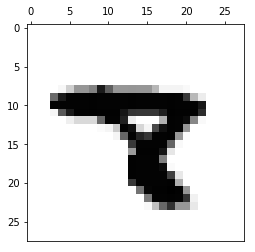

--------------------------------
Training data index =  4536
Labeled class = 6 : Predicted class = 5
Predicted class output =  0.989722447004
Labeled class output =  0.0102768228668



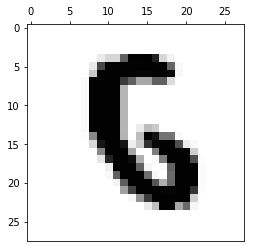

--------------------------------
Training data index =  4571
Labeled class = 6 : Predicted class = 0
Predicted class output =  0.623137893355
Labeled class output =  0.362354095193



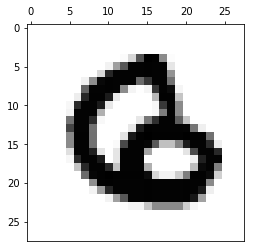

--------------------------------
Training data index =  4731
Labeled class = 8 : Predicted class = 3
Predicted class output =  0.517232921121
Labeled class output =  0.264185919453



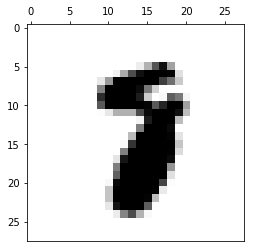

--------------------------------
Training data index =  4807
Labeled class = 8 : Predicted class = 3
Predicted class output =  0.900652765105
Labeled class output =  0.00415454176658



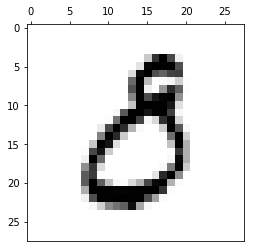

--------------------------------
Training data index =  4823
Labeled class = 9 : Predicted class = 4
Predicted class output =  0.996053973471
Labeled class output =  0.00384777766934



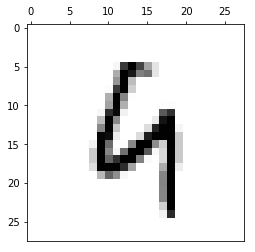

--------------------------------
Training data index =  4860
Labeled class = 4 : Predicted class = 9
Predicted class output =  0.966560093726
Labeled class output =  0.0334398364437



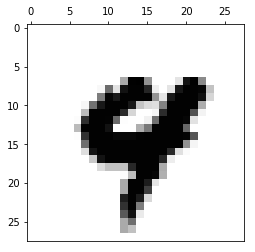

--------------------------------
Training data index =  4879
Labeled class = 8 : Predicted class = 6
Predicted class output =  0.58153215258
Labeled class output =  0.417095470561



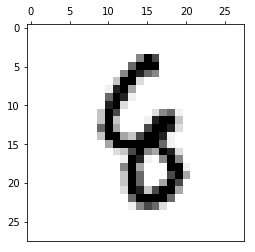

--------------------------------
Training data index =  4880
Labeled class = 0 : Predicted class = 8
Predicted class output =  0.993965184797
Labeled class output =  0.00133149992699



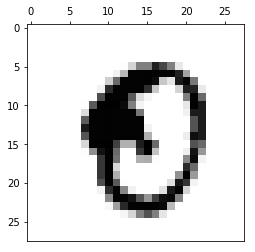

--------------------------------
Training data index =  4966
Labeled class = 7 : Predicted class = 1
Predicted class output =  0.388832296753
Labeled class output =  0.227192277922



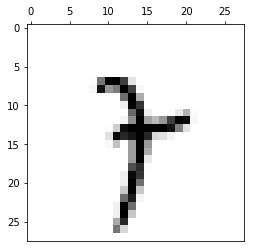

--------------------------------
Training data index =  5457
Labeled class = 1 : Predicted class = 8
Predicted class output =  0.672983644268
Labeled class output =  0.326161167896



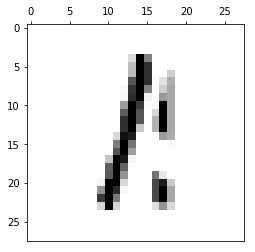

--------------------------------
Training data index =  5642
Labeled class = 1 : Predicted class = 8
Predicted class output =  0.531905676053
Labeled class output =  0.453972525179



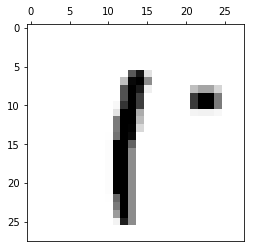

--------------------------------
Training data index =  5676
Labeled class = 4 : Predicted class = 3
Predicted class output =  0.4421918523
Labeled class output =  0.052434183257



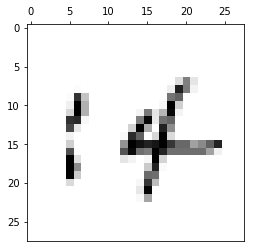

--------------------------------
Training data index =  5734
Labeled class = 3 : Predicted class = 7
Predicted class output =  0.681652489596
Labeled class output =  0.16913270855



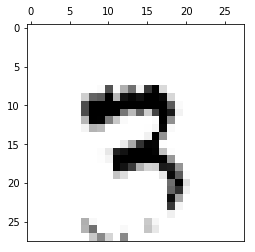

--------------------------------
Training data index =  5887
Labeled class = 7 : Predicted class = 0
Predicted class output =  0.733633746935
Labeled class output =  0.263459080418



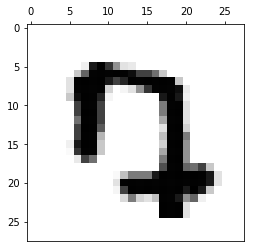

--------------------------------
Training data index =  5936
Labeled class = 4 : Predicted class = 9
Predicted class output =  0.996019639417
Labeled class output =  0.00397972273244



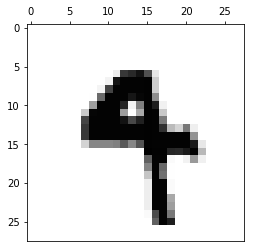

--------------------------------
Training data index =  5937
Labeled class = 5 : Predicted class = 3
Predicted class output =  0.992893128541
Labeled class output =  0.00685823765153



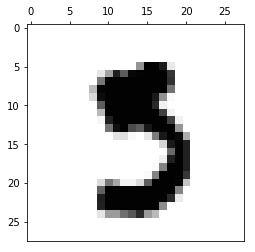

--------------------------------
Training data index =  5955
Labeled class = 3 : Predicted class = 8
Predicted class output =  0.941892696925
Labeled class output =  0.0375706923498



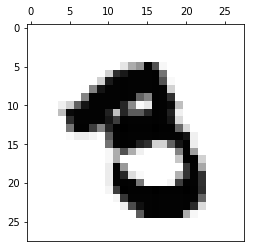

--------------------------------
Training data index =  5973
Labeled class = 3 : Predicted class = 8
Predicted class output =  0.999764916008
Labeled class output =  3.13100649422e-05



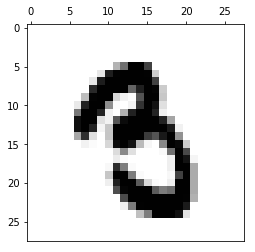

--------------------------------
Training data index =  6011
Labeled class = 3 : Predicted class = 9
Predicted class output =  0.893064147196
Labeled class output =  0.023040922552



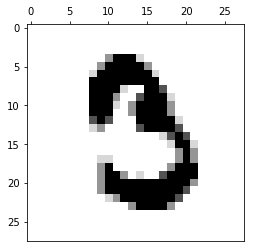

--------------------------------
Training data index =  6166
Labeled class = 9 : Predicted class = 3
Predicted class output =  0.711254399242
Labeled class output =  0.280120063314



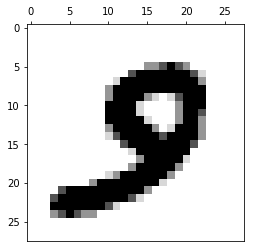

--------------------------------
Training data index =  6555
Labeled class = 8 : Predicted class = 9
Predicted class output =  0.592190088353
Labeled class output =  0.406830676799



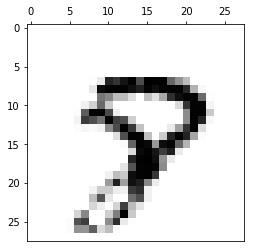

--------------------------------
Training data index =  6571
Labeled class = 9 : Predicted class = 7
Predicted class output =  0.825813524525
Labeled class output =  0.130648673706



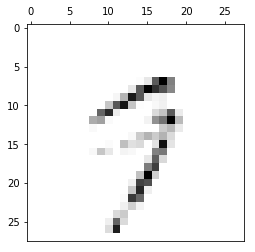

--------------------------------
Training data index =  6597
Labeled class = 0 : Predicted class = 7
Predicted class output =  0.89004371101
Labeled class output =  1.09324400113e-05



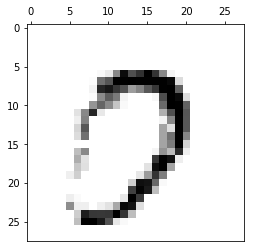

--------------------------------
Training data index =  6641
Labeled class = 8 : Predicted class = 5
Predicted class output =  0.506462513444
Labeled class output =  0.493480116238



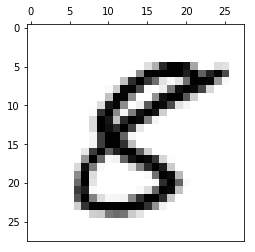

--------------------------------
Training data index =  6783
Labeled class = 1 : Predicted class = 6
Predicted class output =  0.659392170185
Labeled class output =  0.328452818471



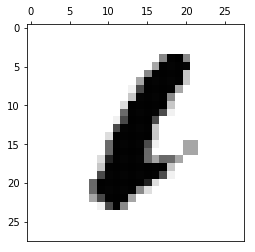

--------------------------------
Training data index =  7921
Labeled class = 8 : Predicted class = 2
Predicted class output =  0.596053449485
Labeled class output =  0.394623839716



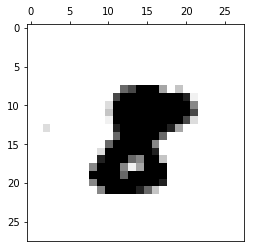

--------------------------------
Training data index =  8094
Labeled class = 2 : Predicted class = 8
Predicted class output =  0.99948190399
Labeled class output =  0.000508099088693



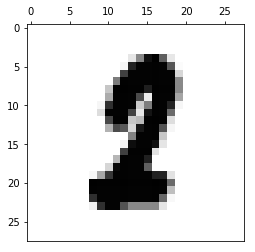

--------------------------------
Training data index =  8246
Labeled class = 3 : Predicted class = 9
Predicted class output =  0.604982158284
Labeled class output =  0.382440146005



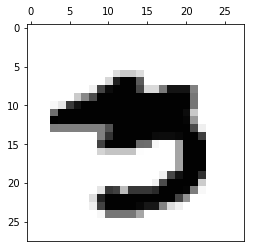

--------------------------------
Training data index =  8311
Labeled class = 6 : Predicted class = 4
Predicted class output =  0.954090897978
Labeled class output =  0.0459067643776



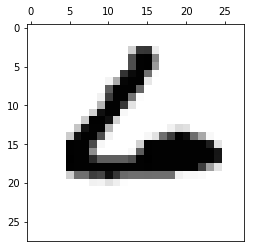

--------------------------------
Training data index =  8325
Labeled class = 0 : Predicted class = 6
Predicted class output =  0.649078579314
Labeled class output =  0.3466631895



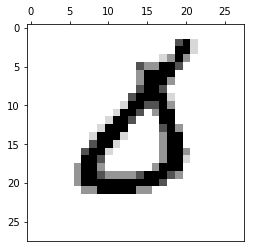

--------------------------------
Training data index =  8408
Labeled class = 8 : Predicted class = 6
Predicted class output =  0.990820372162
Labeled class output =  0.00528752370752



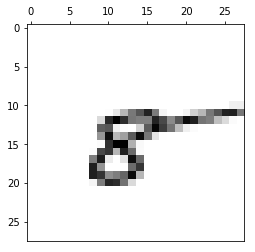

--------------------------------
Training data index =  8522
Labeled class = 8 : Predicted class = 6
Predicted class output =  0.843659469949
Labeled class output =  0.155572338159



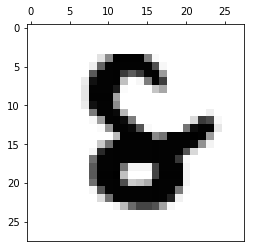

--------------------------------
Training data index =  8527
Labeled class = 4 : Predicted class = 9
Predicted class output =  0.993346841881
Labeled class output =  0.00446404590268



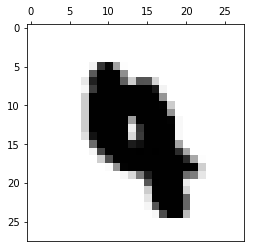

--------------------------------
Training data index =  9009
Labeled class = 7 : Predicted class = 2
Predicted class output =  0.997894955546
Labeled class output =  0.00209684037205



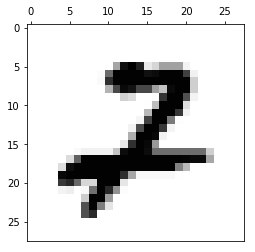

--------------------------------
Training data index =  9015
Labeled class = 7 : Predicted class = 2
Predicted class output =  0.804184941207
Labeled class output =  0.195801901421



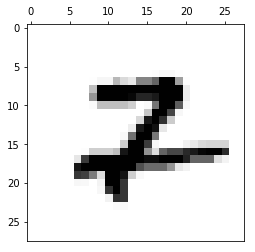

--------------------------------
Training data index =  9024
Labeled class = 7 : Predicted class = 2
Predicted class output =  0.996068711814
Labeled class output =  0.00327414671011



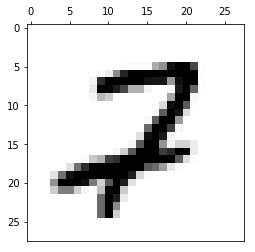

--------------------------------
Training data index =  9587
Labeled class = 9 : Predicted class = 4
Predicted class output =  0.999963598964
Labeled class output =  3.63792966253e-05



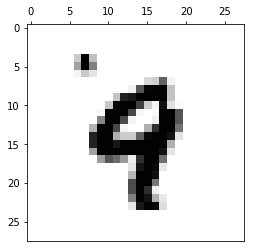

--------------------------------
Training data index =  9634
Labeled class = 0 : Predicted class = 8
Predicted class output =  0.555258017523
Labeled class output =  0.0913242219244



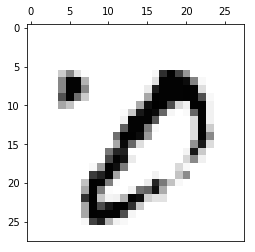

--------------------------------
Training data index =  9664
Labeled class = 2 : Predicted class = 7
Predicted class output =  0.991696713705
Labeled class output =  0.00828021118181



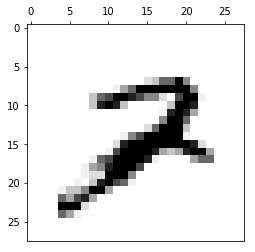

--------------------------------
Training data index =  9669
Labeled class = 4 : Predicted class = 7
Predicted class output =  0.969525054754
Labeled class output =  0.0258052480786



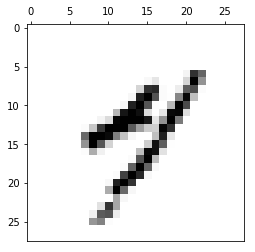

--------------------------------
Training data index =  9679
Labeled class = 6 : Predicted class = 3
Predicted class output =  0.821237442629
Labeled class output =  0.0221653676718



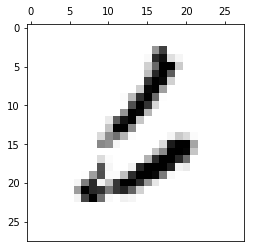

--------------------------------
Training data index =  9729
Labeled class = 5 : Predicted class = 6
Predicted class output =  0.999924466451
Labeled class output =  7.50221308479e-05



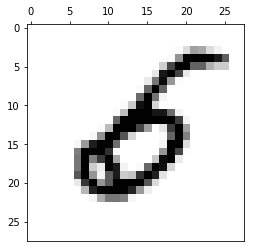

--------------------------------
Training data index =  9745
Labeled class = 4 : Predicted class = 0
Predicted class output =  0.971122673302
Labeled class output =  0.012127790142



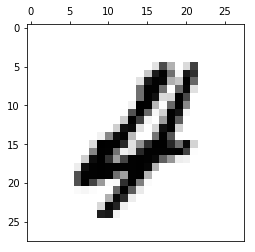

--------------------------------
Training data index =  9768
Labeled class = 2 : Predicted class = 0
Predicted class output =  0.94164716513
Labeled class output =  0.0406244408281



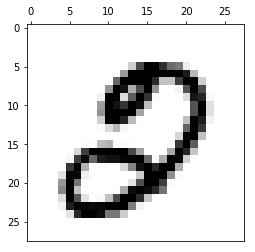

--------------------------------
Training data index =  9770
Labeled class = 5 : Predicted class = 0
Predicted class output =  0.945987471961
Labeled class output =  0.00896236286058



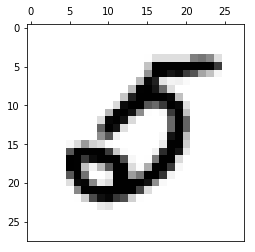

--------------------------------
Training data index =  9792
Labeled class = 4 : Predicted class = 7
Predicted class output =  0.354518018955
Labeled class output =  0.284515094094



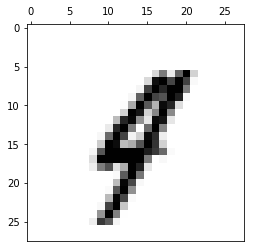

--------------------------------
Training data index =  9808
Labeled class = 9 : Predicted class = 4
Predicted class output =  0.754603981372
Labeled class output =  0.228628660218



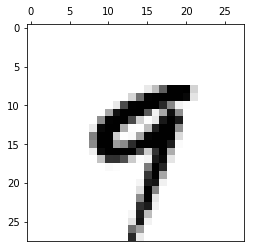

--------------------------------
Training data index =  9839
Labeled class = 2 : Predicted class = 3
Predicted class output =  0.806281509895
Labeled class output =  0.0584396427694



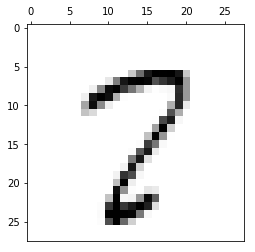

--------------------------------
Training data index =  9858
Labeled class = 6 : Predicted class = 8
Predicted class output =  0.512036419124
Labeled class output =  0.262266028564



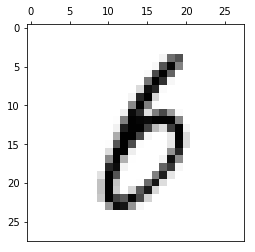

--------------------------------


In [13]:
for error in errDict.values():
    print ("Training data index = ", str(error.index))
    print ("Labeled class = {0} : Predicted class = {1}".format(error.y, error.pred_y))
    print ("Predicted class output = ", str(pred_y[error.pred_y][error.index]))
    print ("Labeled class output = ", str(pred_y[error.y][error.index]))
    print()
    error.show()
    print ("--------------------------------")

## Error matrix
Draw a matrix that plots a heat map of errors.

In [14]:
errGrid = [[0 for col in range(10)] for row in range(10)]
for i in range(pred_y_class.shape[0]):
    errGrid[int(test_y_class[i])][pred_y_class[i]] += 1

for i in range(10):
    errGrid[i][i] = 0

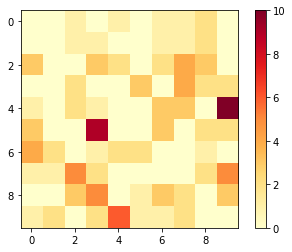

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
plt.imshow(errGrid, interpolation='nearest', cmap=plt.cm.YlOrRd)
plt.colorbar()
plt.show()